## Task: We have a medical data

- Two features are given that are releted to brain chemistry:

    -Serotonin 
    
    -Dopamine
    
- The target shows the brain health, which indicates having or not having depression

In [23]:
# IMPORTS

import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("SVM_dataset1.csv", index_col=0)
df.head()

,X1,X2,y
0,2.947814,6.626878,1
1,2.530388,7.785050,1
2,3.566991,5.651046,1
3,3.156983,5.467077,1
4,2.582346,4.457777,-1


## Build X_train & Y_train arrays

In [25]:
X1=df['X1']
X2=df['X2']
X_train=np.array(list(zip(X1,X2)))
X_train

array([[2.947814, 6.626878],
       [2.530388, 7.78505 ],
       [3.566991, 5.651046],
       [3.156983, 5.467077],
       [2.582346, 4.457777],
       [2.155826, 6.222343],
       [3.273418, 3.520687]])

In [26]:
y_train=df['y'].values

print(y_train)

[ 1  1  1  1 -1 -1 -1]


## Obtain line of best fit that seperate these 2 groups

In [27]:
svm_classifier = svm.SVC(kernel='linear', C=10)
svm_classifier.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Assign color and label to each target class

In [30]:
color_ls = []
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
color_ls
        

['b', 'b', 'b', 'b', 'r', 'r', 'r']

In [31]:
label = []
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')
label

['H', 'H', 'H', 'H', 'NH', 'NH', 'NH']

## Visualisation

In [32]:
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

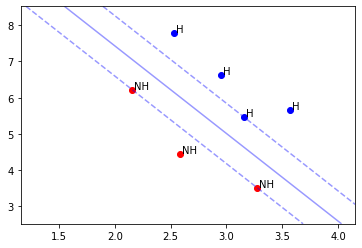

In [33]:
plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])

### Number of Support Vectors for each class:

In [34]:
svm_classifier.n_support_

array([2, 1], dtype=int32)

### # What are those Support Vectors:

In [35]:
svm_classifier.support_vectors_

array([[2.155826, 6.222343],
       [3.273418, 3.520687],
       [3.156983, 5.467077]])

In [37]:
df_2 = pd.read_csv("SVM_dataset2.csv", index_col=0)

## 4 Types of Error